**Données IRM transversales chez les jeunes, les personnes d'âge moyen, les personnes âgées non démentes et démentes** : Cet ensemble consiste en une collection transversale de 416 sujets âgés de 18 à 96 ans. Pour chaque sujet, 3 ou 4 IRM individuelles pondérées en T1 obtenues en une seule séance sont incluses. Les sujets sont tous droitiers et comprennent des hommes et des femmes. 100 des sujets inclus, âgés de plus de 60 ans, ont reçu un diagnostic clinique de maladie d'Alzheimer (MA) très légère à modérée. En outre, un ensemble de données de fiabilité est inclus, comprenant 20 sujets non déments examinés lors d'une visite ultérieure dans les 90 jours suivant leur session initiale.

**Données IRM longitudinales chez des personnes âgées non démentes et démentes** : Cet ensemble consiste en une collection longitudinale de 150 sujets âgés de 60 à 96 ans. Chaque sujet a été scanné lors de deux visites ou plus, séparées d'au moins un an, pour un total de 373 sessions d'imagerie. Pour chaque sujet, 3 ou 4 IRM individuelles pondérées en T1 obtenues en une seule séance sont incluses. Les sujets sont tous droitiers et comprennent des hommes et des femmes. 72 des sujets ont été caractérisés comme non déments tout au long de l'étude. 64 des sujets inclus ont été caractérisés comme déments lors de leurs visites initiales et le sont restés pour les scanners suivants, dont 51 individus atteints de la maladie d'Alzheimer légère à modérée. Quatorze autres sujets ont été caractérisés comme non déments au moment de leur visite initiale et ont été caractérisés comme déments lors d'une visite ultérieure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploration des données

In [2]:
# Création du dataframe
data = pd.read_csv('oasis_cross.csv')

In [3]:
# Dimensions du dataset
data.shape

(436, 12)

Le dataset contient 436 lignes (patients) et 12 colonnes (caractéristiques)

In [4]:
# Aperçu des 5 premières lignes du dataset
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [5]:
# Informations sur le contenu des colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


Un bref aperçu sur les données nous apprend qu'un certain nombre d'entre elles semblent manquantes. Essayons de chiffrer cela plus clairement.

In [6]:
# Nombre de données manquantes par colonne
data.isna().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

- Les colonnes `ID`, `M/F`, `Hand`, `Age`, `eTIV`, `nWBV` et `ASF` ont une excellent intégrité, elles ne contiennent aucune valeur manquante.
- L'intégrité des colonnes `Educ`, `SES`, `MMSE` et `CDR` est plus problématique, elle présentent chacune environ 200 valeurs manquantes sur les 436 lignes, soit environ 45% du dataset
- Les valeurs de la colonne `Delay` sont quant à elles presque systématiquement manquantes (416/436), nous allons donc choisir de la supprimer du dataframe

In [7]:
# Suppression de la colonnes du dataframe
data = data.drop(['Delay'], axis=1)

Afin d'exploiter au mieux le dataset, nous allons supprimer toutes les lignes présentant au moins une donnée manquante

In [8]:
# Suppression des lignes avec des données manquantes
data = data.dropna(axis=0, how='any')

Par commoditié, nous allons renommer certaines colonnes

In [9]:
# Renommage des colonnes
data.rename(columns= {"M/F" : "genre",
                      "Hand" : "hand",
                      "Age" : "age",
                      "Educ" : "educ",
                      "ID" : "id"},
            inplace= True)

In [10]:
data.head()

,id,genre,hand,age,educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


In [11]:
data.shape

(216, 11)

Initialement composé de 436 lignes, notre dataframe, débarassé de ses données manquantes, n'en dispose plus que de 216.

**Explication des variables**

- **id** : Identifiant unique du patient
- **genre** :
  - F = Female
  - M = Male
- **hand** : Main dominante du patient
  - R = Right
  - L = Left
- **age** : âge du patient
- **educ** : Niveau d'éducation du patient
  - 1 = less than high school grad 
  - 2 = high school grad 
  - 3 = some college 
  - 4 = college grad 
  - 5 = beyond college
- **SES** : (SocioEconomic Status) statut socio-économique du patient
  - 1 = Très bas
  - 2 = Bas
  - 3 = Moyen
  - 4 = Haut
  - 5 = Très haut
- **MMSE** : (Mini Mental State Examination) Evaluation rapide de l'état cognitif du patient
  - +=27 = Atteinte nulle
  - 21-26 = Atteinte légère
  - 11-20 = Atteinte modérée
  - <=10 = Atteinte sévère
- **CDR** : (Clinical Dementia Rating)
  - 0 = Absence de trouble
  - 0.5 = Troubles incertaines
  - 1 = Troubles bénins
  - 2 = Troubles modérés
  - 3 = Troubles sévères
- **eTIV** : (Estimated Total Intracranial Volume) Volume total du crâne qui contient le cerveau, le LCR et les méninges
- **nWBV** : (Normalize Whole Brain Volume) Mesure qui permet de standardiser le volume total du cerveau d'un individu en le rapportant à une référence, généralement l'eTIV. En d'autres termes, le nWBV exprime le volume cérébral en rapport du volume total du crâne (eTIV)
- **ASF** (Atlas Scaling Factor) Facteur utilisé dans la recherche en neuroimagerie pour normaliser les mesures cérébrales entre les individus tout en tenant compte des différences de taille et de forme de la tête. Il garantit la cohérence des comparaisons et des analyses, en particulier dans les études sur la prédiction et la recherche concernant la maladie d'Alzheimer

In [12]:
data.describe()

,age,educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,72.444444,3.231481,2.490741,27.324074,0.261574,1458.638889,0.750500,1.217176
std,12.306424,1.333689,1.120593,3.436680,0.382593,160.523125,0.048271,0.128858
min,33.000000,1.000000,1.000000,15.000000,0.000000,1123.000000,0.644000,0.881000
25%,66.000000,2.000000,2.000000,26.000000,0.000000,1346.000000,0.715000,1.141750
50%,73.000000,3.000000,2.000000,29.000000,0.000000,1445.500000,0.748500,1.214500
75%,81.000000,4.000000,3.000000,30.000000,0.500000,1536.500000,0.786000,1.304000
max,96.000000,5.000000,5.000000,30.000000,2.000000,1992.000000,0.841000,1.563000


In [13]:
data.head()

,id,genre,hand,age,educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


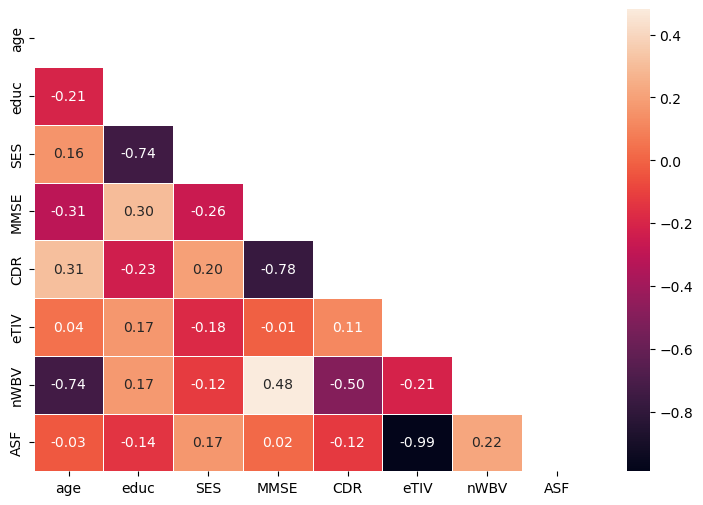

In [14]:
corr = data.select_dtypes(include=['int', 'float']).corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='rocket', mask=np.triu(corr))
plt.show()